# Aula 5 | Limitações e os Modelos de Classificação

## Prevendo atrasos de vôos

Nosso _case_ a ser analisado na aula de hoje é um _dataset_ que contém algumas características sobre informações de vôos.

Nosso foco, basicmente, consiste em prever se um determinado vôo sofrerá atrasos, à partir da informação da partida programada.

- **Flight**: número do vôo
- **Time**: horário de partida do vôo
- **Lenght**: duração do vôo
- **Airline**: companhia aérea
- **AirportFrom**: origem
- **AirportTo**: destino
- **DayOfWeek**: dia da semana
- **Class**: classe de atraso



https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2006/Base%20de%20Dados/airlines.csv

In [1]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importando a base de dados
df = pd.read_csv('https://raw.githubusercontent.com/camimq/machine_learning_and_time_series/main/bases/airlines.csv', sep=',')

In [7]:
# Verifica as primeiras linhas para entender os dados
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0


In [8]:
# Analisa linhas e colunas
df.shape

(539382, 8)

## Analisando a consistência dos dados

Vamos validar se o _dataset_ contém dados nulos e valores duplicados.

In [9]:
# Analisa valores nulos
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [10]:
# Limpa dados nulos
df = df.dropna()

Conforme analisado, não temos nenhum valor nulo na base de dados.

In [12]:
# Verifica dados duplicados
duplicated_cols = []
for col in df.columns:
    if df[col].duplicated().any():
        duplicated_cols.append(col)
print(duplicated_cols)

['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


Conforme análise sobre os valores duplicados, podemos considerar o comportamento normal pois podemos ter vários casos com o mesmo valor na base.

## Análise exploratória dos dados

Vamos construir uma análise inicial para conhecer os dados. Primeiramente, vamos aplicar a análise estatística descritiva dos dados e fazer algumas inferências sobre os dados.

In [13]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Inferência:

- Média de duração de vôos e de 133
- Desvio padrão: 70

Se o desvio padrão é baixo em relação à média, isso significa que a maioria dos valores estão próximos da média e que os dados estão mais concentrados em torno da média.

Vamos dar uma olhada nos gráficos:

Vamos analisar o tempo do vôo utilizando um gráfico **_violin_** em conjunto com o **boxplot**:

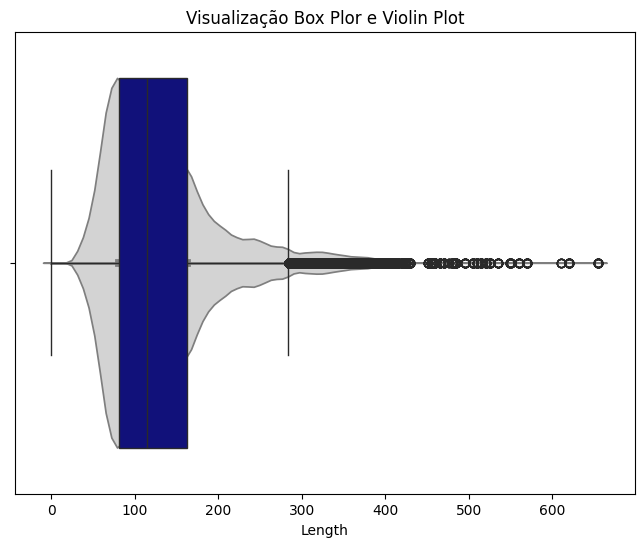

In [14]:
# Podemos também mesclar os dois tipos de gráficos para entender nossos valores discrepantes
fig, ax = plt.subplots(figsize = (8,6))
# Configurando o violin plot
sns.violinplot(x='Length', data = df, ax = ax, color = 'lightgray')
# Por baixo vamos criar um boxplot
sns.boxplot(x = 'Length', data = df, ax = ax, whis = 1.5, color='darkblue')
ax.set_title('Visualização Box Plor e Violin Plot')

plt.show()

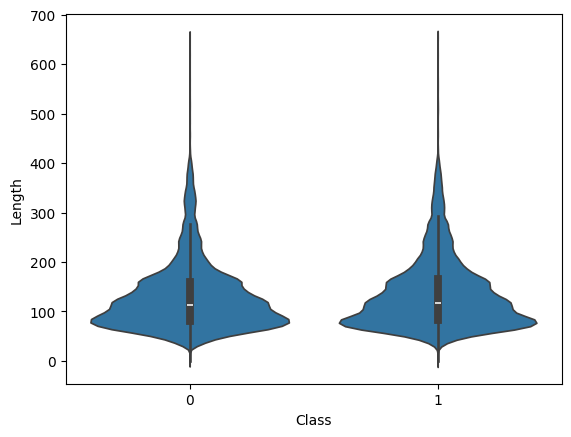

In [15]:
sns.violinplot(x='Class', y='Length', data = df)
plt.show()

Perceba que a distribuição dos dados entre as classes de atraso sim e não, são bem parecidas. Vamos olhar a média de duração dos vôos.

In [16]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

Analisando as estatísticas acima, percebe que a variável `Time` é mais discrepante que `Length`.

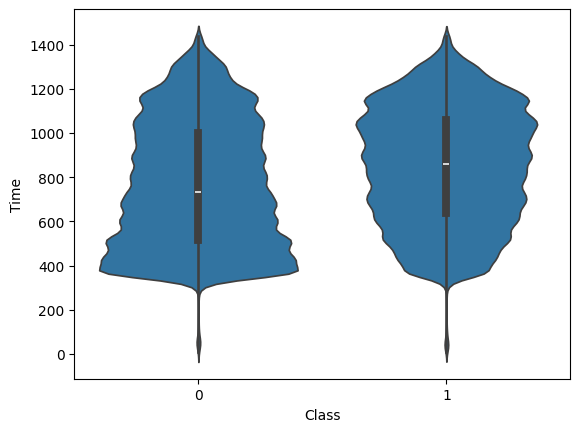

In [17]:
sns.violinplot(x = 'Class', y = 'Time', data = df)
plt.show()

Analisando as companhias aéreas x atrasos dos voos

<Axes: xlabel='Airline', ylabel='count'>

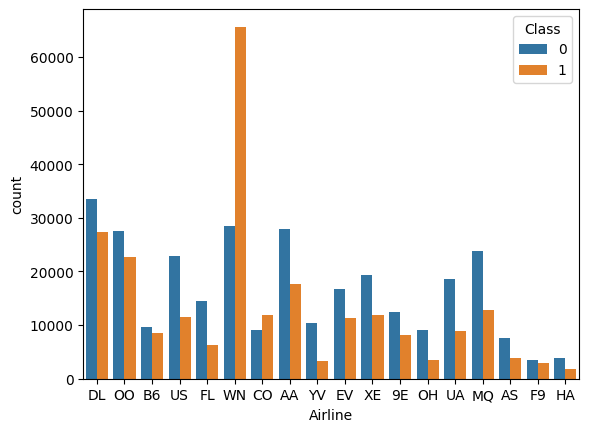

In [18]:
sns.countplot(x = 'Airline', hue = 'Class', data = df)

Inferência dos dados:podemos observar que todas as companhias aéreas possuem a classe de atraso porém são menores do que os vôos sem atraso. Apenas a companhia aérea **WN** possui um grande número de atrasos, ultrapassando o total de voos realizados _on time_.

Vamos analisar os dias da semana que possuem maior concentração de atrasos.

<Axes: xlabel='DayOfWeek', ylabel='count'>

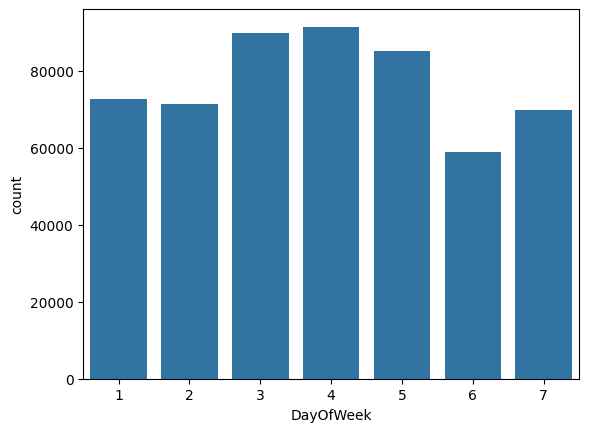

In [19]:
diaSemana = list(range(1,8))
sns.countplot(x = 'DayOfWeek', data = df, order = diaSemana)

A maior concentração de atrasos ocorre na quarta-feira.

Vamos analisar se a base está equilibrada com o número de atrasos e não atrasos.

<Axes: xlabel='Class', ylabel='count'>

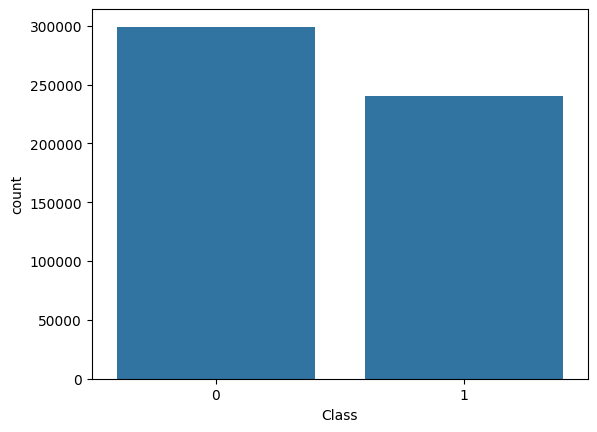

In [20]:
sns.countplot(x = 'Class', data = df)

Observe que a qui podemos ter um problema ao construi um modelo de classificação. A base de dados não está equilibrada e a falta de equilíbrio na base de dados pode deixar o algoritmo enviesado.

Esse tipo de problema é chamada de **desbalanceamento de classes**.

Quando uma classe é muito mais frequente que as outras no conjunto de dados, o modelo tende a dar mais importância a essa classe, o que pode levar a uma classificação incorreta das classes minoritárias.

Vamos criar um classificar utilizando os dados desbalanceados e vamos analisar o que pode acontecer no modelo de _machine learning_.

## Pré-processamento da base

Para utilizar a companhia aérea dentro do modelo, vamos realizar a transformação da _label enconding_ nos dados.

In [28]:
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df['AirportFrom'] = LabelEncoder().fit_transform(df['AirportFrom'])
df['AirportTo'] = LabelEncoder().fit_transform(df['AirportTo'])

In [23]:
df['Airline'] = LabelEncoder().fit_transform(df['Airline'])

In [24]:
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0


## Separando a base de dados

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
x = df[['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
y = df['Class']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=7)

## Criando o modelo **Naive Bayes**

**Naive Bayes** é um algoritmo baseado no teorema de Bayes e na suposição de independência condicional entre atributos.

O modelo Naive Bayes calcula a probabilidade condicional de uma determinada classe, dada uma entrada de dados ou conjunto de atributos, utilizando a regra de Bayes.

Ele assume que os atributos de entrada são independentes entre si, ou seja, a presença ou ausência de um atributo não é afetada pela presença ou ausência de outro atributo.

In [31]:
from sklearn.naive_bayes import GaussianNB

In [33]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
# Predizendo valores
y_pred = gnb.predict(x_test)


## Validando o modelo

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', round(accuracy, 2))

Accuracy:  0.59


De modo geral, o modelo **não** obteve um poder preditivo grande...

Nesse caso, podemos encontrar alguns desafios (limitações) sobre os modelos classificadores.

Podemos ter alguns impedimentos que podem ocasionar resultados ruin em nossos algoritmos, sendo eles: algoritmos ruins ou dados ruins.

Vamos conversar um pouquinho sobre esses desafios! Se tratando de dados ruins, podemos ter alguns fatores:

- **Quantidade insuficiente de dados:** com uma amostra de dados muito pequena, existirá um "ruído de amostragem" e se houver uma amostra muito grande com dados não representativos, o método de amostragem também pode ser falho (viés de amostragem).

- **Dados de treinamento não representativos:** o objetivo de um bom modelo de aprendizado de máquina é generalizar bem a partir dos dados de treinamento, sendo assim, é importante buscar uma base de dados representativa. Será que a sua base ded dados consegue generalizar?

- **Dados de baixa qualidade:** aqui é preciso se dedicar a limpeza de dados, uma base não consistente pode impactar na detecção de padrões.

- **Características irrelevantes:** entra lixo, sai lixo. Atenção aos dados que entram no seu modelo! A dica aqui é a dedicação na etapa de *feature engineering* ou técnicas de redução da dimensionalidade.

## Equilibrando a base de dados

Para equilibrar a base de dados, podemos utilizar algumas técnicas como por exemplo, a biblioteca *resample* do `sklearn.utils`, utilizando o `oversampling`.

O *oversampling* é um processo de duplicar ou criar novas amostras de classe minoritária, enquando o *undersampling* é o processo de remover algumas amostras da classe majoritária.

Vamos analisar como nosso resultado pode ter um upgrade com *oversampling*?

In [37]:
from sklearn.utils import resample

In [38]:
# Separando as classes majoritárias e minoritárias
df_majority = df[df.Class == 0]
df_minortiy = df[df.Class == 1]

In [43]:
len(df_majority)

299118

In [39]:
# Unsampling da classe minoritária
df_minority_upsample = resample(df_minortiy, replace = True, n_samples = len(df_majority), random_state = 7)

In [40]:
# Juntando os dois Dataframes
df_equilibrio = pd.concat([df_majority, df_minority_upsample])

<Axes: xlabel='Class', ylabel='count'>

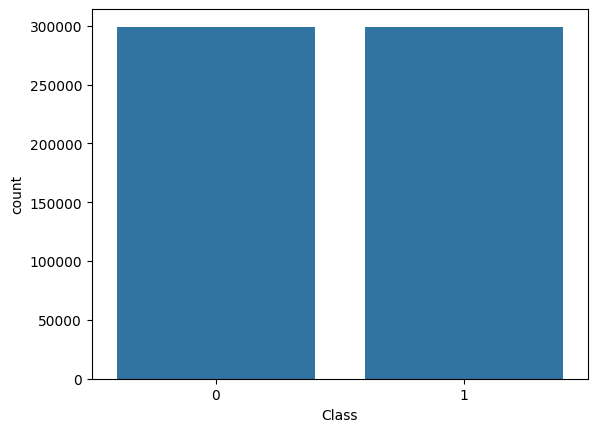

In [41]:
sns.countplot(x = 'Class', data = df_equilibrio)

Agora sim, temos uma base de dados equilibrada!

## Testando o algoritmo com base equilibrada

In [44]:
x_equilibrado = df_equilibrio[['Flight', 'Time', 'Length', 'DayOfWeek']]
y_equilibrado = df_equilibrio['Class']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size = 0.3, stratify = y_equilibrado, random_state = 7)

In [46]:
# Treinando o algoritmo
gnb_equilibrado = GaussianNB()
gnb_equilibrado.fit(x_train, y_train)

GaussianNB()

In [47]:
# Predizendo valores
y_pred_gnb_equilibrado = gnb_equilibrado.predict(x_test)

## Validando o modelo

In [49]:
accuracy_equilibrado = accuracy_score(y_test, y_pred_gnb_equilibrado)
print('Accuracy: ', round(accuracy_equilibrado, 2))

Accuracy:  0.57


Também não tivemos muito avanço. Nesse caso, quando todas as alternativas não dão certo, o que podemos fazer?

Podemos tentar buscar novas alternativas utilizando outros algoritmos de *machine learning*.

Agora, vamos falar um pouquinho sobre algoritmos ruins:

- **Sobreajuste nos dados (*overfiting*):** quando o seu modelo funciona muito bem com os dados de treinamento mas não generaliza bem novos dados de entrada. Isso pode acontecer quando o modelo é muito complexo em relação ao ruído e quantidade. Como solução pode pensar em:

    - Simplificar o modelo
    - Coletar mais dados
    - Reduzir o ruído (exemplo, remover outliers)
    - Regularização: chamamos de regularização quando restringimos um modelo para simplicar e reduzir o risco de reajuste dos dados. A regularização pode ajudar a generalizar melhor o modelo em novos exemplos de dados.

- **Subajuste do dados (*underfiting*):** nesse caso, seu modelo ficou muito simples ao ponto de não aprender corretamente os dados:
    
    - Selecionar um modelo mais poderoso
    - *Feature Engineering*
    - Reduzir as regularizações
    

## Testando com Randim Forest

O modelo de **Random Forest** cria de forma aleatória várias árvores de decisão (*decision tree*) e combina o resultado de todas elas para chegar no resultado final.

Vamos analisar se combinar uma base de dados equilibrada com um algoritmo diferente e poderoso de classificação pode melhorar nossos resultados.

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size = 0.3, random_state=7)

In [52]:
# Instancia  modelo Random Forest e define os hiperparâmetros
rf = RandomForestClassifier(random_state=7)

In [53]:
# Treina o modelo com o conjunto de treinamento
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

In [54]:
# Faz previsões no conjunto de teste
y_pred_rf = rf.predict(x_test)

## Validando o modelo

In [55]:
accuracy_equilibrado_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', round(accuracy_equilibrado_rf, 2))

Accuracy:  0.69
